<a href="https://colab.research.google.com/github/PatriciaReyesAv/Prediccion-de-ventas/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
sales='/content/drive/MyDrive/Coding Dojo/Semana 01/sales_predictions.csv'

In [2]:
sales_doc=pd.read_csv(sales)
sales_doc.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
#1) ¿Cuántas filas y columnas?
# Numero de Columnas
sales_doc.count(axis=1)

0       12
1       12
2       12
3       11
4       12
        ..
8518    12
8519    11
8520    12
8521    12
8522    12
Length: 8523, dtype: int64

In [4]:
#Numero de filas
sales_doc.count(axis=0)

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [5]:
sales_doc.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

In [6]:
#2) ¿Cuáles son los tipos de datos en cada variable?
sales_doc.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.
sales_doc.duplicated(keep='first').count()

8523

In [8]:
sales_doc.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#4) Identifiquen los valores faltantes.
sales_doc.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Existen  1463 datos faltantes en Item_Weihgt, 2410 datos faltantes en Outlet_Size

In [11]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).
#D Para el caso del peso y debido a que es una gran cantidad de datos faltantes no se pueden eliminar, según mi análisis y para que no se vean afectados los resultados es mejor rellenarlos con pomedios.
weight_prom=sales_doc['Item_Weight'].mean().round(3)
weight_prom

12.858

In [12]:
sales_doc['Item_Weight'].fillna(weight_prom,inplace=True)
sales_doc.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Analizando 'Outlet_Size'
sales_doc.groupby('Outlet_Size')['Item_Weight'].count()

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Item_Weight, dtype: int64

In [14]:
#Debido a la menor cantidad de datos 'Outlet_Size', se presume que los datos faltante correspomden a esta categoría, por lo que procedemos a completar la información.
Size_cant=sales_doc['Outlet_Size'].fillna('High', inplace=True)
Size_cant

In [15]:
#6) Confirmen que no hay valores faltantes después de abordarlos.
sales_doc.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [16]:
#7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [17]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
sales_doc.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [18]:
# PROYECTO_01_03
sales_doc.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

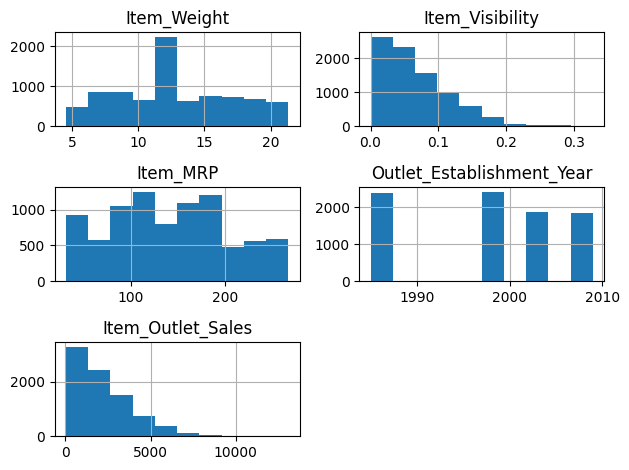

In [20]:
# 3.1 Histograma para ver las distribuciones de diversas características en el conjunto de datos.
sales_doc.hist()
plt.tight_layout()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

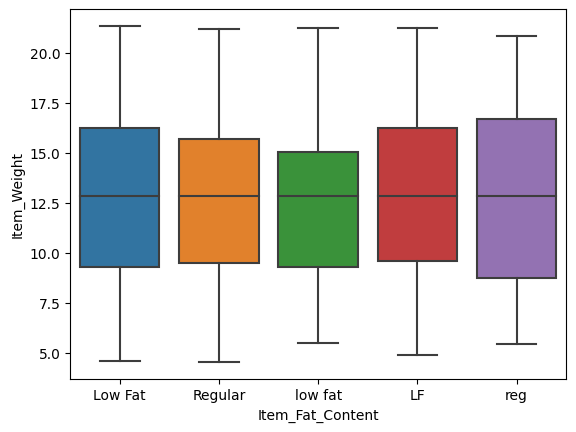

In [21]:
# 3.2 Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
sns.boxplot(x='Item_Fat_Content',y='Item_Weight',data=sales_doc)

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

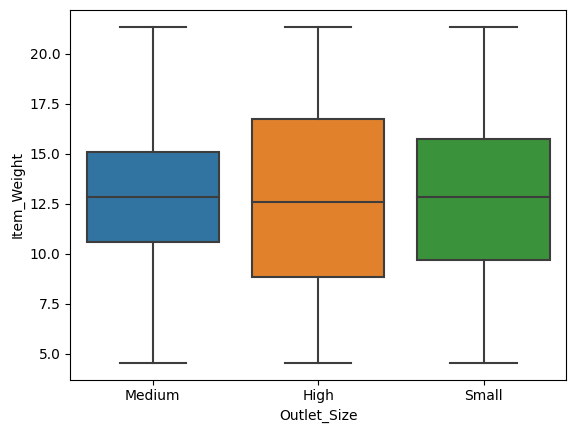

In [22]:
sns.boxplot(x='Outlet_Size',y='Item_Weight',data=sales_doc) #Se relaciona el peso del producto de acuerdo a la talla
#Se observa que las medias de los tres tamaños son casi iguales.

<ipython-input-23-589682e44658>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=sales_doc.corr()


<Axes: >

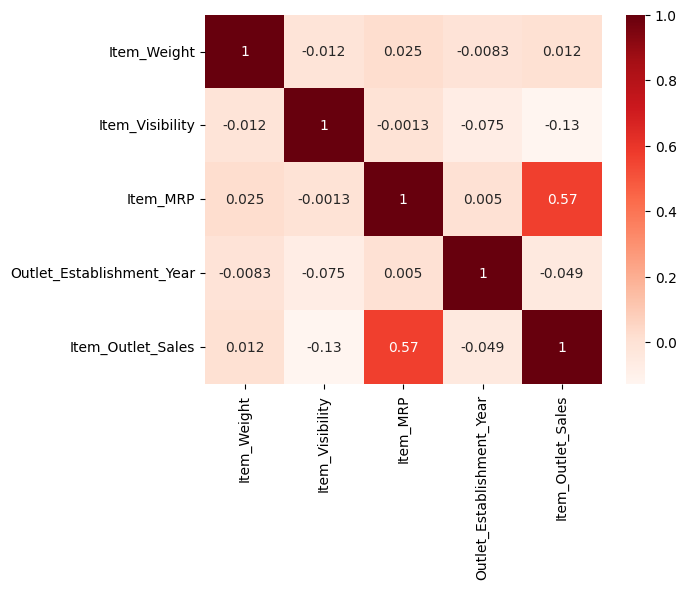

In [23]:
# 3.3 Mapa de calor de la correlación entre las características.
corr=sales_doc.corr()
sns.heatmap(corr,cmap='Reds', annot=True) # No hay correlación entre los datos

In [24]:
# INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO
sales_doc.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [25]:
# 2.0 Identifiquen el objetivo (X) y las características (y)
# X = {'Item_Identifier',	'Item_Weight',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP',	'Outlet_Identifier',
#	'Outlet_Establishment_Year',	'Outlet_Size',	'Outlet_Location_Type',	'Outlet_Type'}
# y = {'Item_Outlet_Sales'}

In [26]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [27]:
# 2.1 Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características
X=sales_doc.drop('Item_Outlet_Sales', axis=1)
y=sales_doc['Item_Outlet_Sales']

In [28]:
# 2.2 Realicen un train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [29]:
sales_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [30]:
# 2.3 Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.
cat_selector=make_column_selector(dtype_include='object')
num_selector=make_column_selector(dtype_include='number')

In [31]:
# Codificación de SimpleImputer para datos numéricos y datos categóricos
freq_imputer=SimpleImputer(strategy='most_frequent')
mean_imputer=SimpleImputer(strategy='mean')
ohe=OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

In [32]:
# Instanciar Pipeline
# Numeric Pipeline
num_pipe=make_pipeline(mean_imputer,scaler)
# Categorical Pipeline
cat_pipe=make_pipeline(freq_imputer,ohe)

In [65]:
num_tuple=(num_pipe,num_selector)
cat_tuple=(cat_pipe,cat_selector)

In [66]:
# Aqui se juntan los pipeline
preprocessor=make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3048b24280>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f304777c520>)])

In [67]:
preprocessor.fit(X_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3048b24280>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f304777c520>)])

In [70]:
# Transformado train y test 
X_train_processed= preprocessor.transform(X_train)
X_test_processed=preprocessor.transform(X_test)

In [72]:
# Guardar los nombres de las columnas
columns_df=[col.split('_')[-1] for col in preprocessor.get_feature_names_out(input_features=None) ]

In [74]:
X_train_processed_df=pd.DataFrame(X_train_processed,columns=columns_df)
X_train_processed_df.head()

,Weight,Visibility,MRP,Year,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0.819150,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.558243,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.129602,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.167300,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.530714,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [39]:
# PROYECTO 01: FINAL
# 1.0 La primera tarea será crear un modelo de regresión lineal para predecir las ventas
#     a. Creen un modelo de regresión lineal.
dec_tree=DecisionTreeRegressor(random_state=42)

In [45]:
dec_tree.fit(X_train,y_train)

ValueError: ignored